In [1]:
CKPT_PTH = "models/saved_models/feb_version_3/checkpoints/epoch=4-step=2475.ckpt"
SAVE_PLOTS = True

import torch
from models.rabignn import PLModule

torch.manual_seed(1337)

# def find_ckpt_file(directory):
#     directory = os.path.join(directory, "checkpoints")
#     ckpt_file = [file for file in os.listdir(directory) if file.endswith('.ckpt')][0]

#     return os.path.join(directory,ckpt_file)


# checkpoint_pth = find_ckpt_file(MODEL_PTH)

# # Load parameters from the YAML file
# with open(MODEL_PTH +"/hparams.yaml", "r") as yaml_file:
#     hparams = yaml.safe_load(yaml_file)

# Load actual model
try:
    model = PLModule.load_from_checkpoint(CKPT_PTH)
except RuntimeError:
    model = PLModule.load_from_checkpoint(CKPT_PTH, map_location='cpu')
    
model = model.to('cpu')
model.eval()

PLModule(
  (model): GNN(
    (dropout): Dropout(p=0.25, inplace=False)
    (embedding_layer): Linear(20, 5, bias=True)
    (first_layer): GATv2Conv(15, 50, heads=4)
    (inner_layers): ModuleList(
      (0-2): 3 x GATv2Conv(205, 50, heads=4)
    )
    (last_layer): GATv2Conv(205, 10, heads=1)
  )
  (loss_mse): MSELoss()
)

# Synthetic Data

In [2]:
from data.synthetic import SyntheticDataset
import torch_geometric.transforms as T
from utils.transforms import Add2DMask, Apply2DMask


transform = T.Compose([
            T.Distance(norm=False),
            T.Cartesian(),
            Add2DMask(0.04,#random.uniform(0.04, 0.15),
                        seq_len=10),
            Apply2DMask(),
        ])


synth_dataset = SyntheticDataset(root="data/30x25/", type="valid", radius=0.3, transform=transform)

In [ ]:
from utils.mapping import plot_data

data = synth_dataset[4000]
with torch.no_grad():
    pred = model(data)


plot_data(data, pred, data.orig_pos, cell_size=1, ground_truth=data.ground_truth)
    #, pred, data.orig_pos, cell_size=1, ground_truth=data.ground_truth)

ModuleNotFoundError: No module named 'matplotlib'

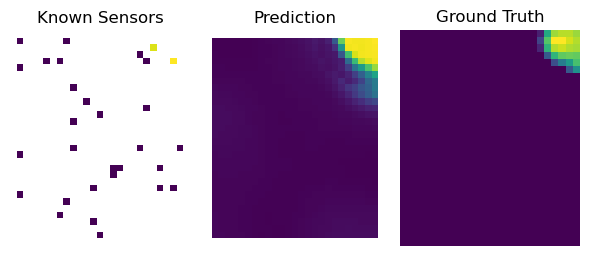

In [4]:
data = synth_dataset[1000]
with torch.no_grad():
    pred = model(data)

plot_data(data, pred, data.orig_pos, cell_size=1, ground_truth=data.ground_truth)

# HRM

In [10]:
from data.hrm import HRMDataset
from utils.virtual import add_virtual_nodes

hrm_dataset = HRMDataset(root="data/hrm/", environmental_param="gas")

data = hrm_dataset[4800]
data

Processing...
Processing data/hrm/raw/data.pkl: 100%|██████████| 127964/127964 [01:42<00:00, 1248.19it/s]
Done!


Data(y=[16, 10], pos=[16, 2], id=[16], orig_pos=[16, 2], datetime=[10], edge_index=[2, 16], known=[16, 10], x=[16, 10])

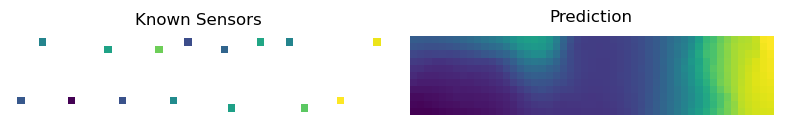

In [17]:
import torch_geometric.transforms as T
from utils.mapping import plot_data

CELL_SIZE = 3

data = hrm_dataset[4000]
upscaled_data = add_virtual_nodes(data, cell_size=CELL_SIZE, x_range=[0,152], y_range=[0,30])

with torch.no_grad():
    pred = model(upscaled_data)

plot_data(upscaled_data, pred, upscaled_data.orig_pos, rot_k=1, scale=2, cell_size=CELL_SIZE)

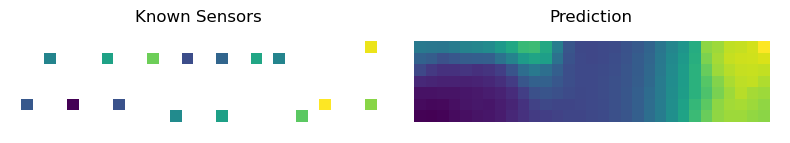

In [18]:
import torch_geometric.transforms as T

CELL_SIZE = 5

upscaled_data = add_virtual_nodes(data, cell_size=CELL_SIZE, x_range=[0,152], y_range=[0,30])

with torch.no_grad():
    pred = model(upscaled_data)

plot_data(upscaled_data, pred, upscaled_data.orig_pos, rot_k=1, scale=2, cell_size=CELL_SIZE)